In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter

In [ ]:
# VCG function
def VCG(subset, num_slots = 3, click_rate = [0.2, 0.1, 0.05], res_p = 10, ads_cost = 1):
  valuation = subset[subset['PRICE']>=res_p].groupby('ACCOUNT_ID')['PRICE'].max()
  valuation_count = len(valuation)
  if valuation_count == 0:
    VCG_payment = {}
    VCG_payment['revenue'] = 0
    return VCG_payment
  if valuation_count > num_slots:
    valuation = pd.DataFrame(valuation.sort_values(ascending = False)[:num_slots+1])
  else:
    valuation =  pd.DataFrame(valuation.sort_values(ascending = False))
    count = 0
    while count < num_slots + 1 - valuation_count:
      add_row = pd.DataFrame({'ACCOUNT_ID': [count], 'PRICE': [0]})
      add_row.set_index(['ACCOUNT_ID'], inplace = True)
      valuation = valuation.append(add_row, ignore_index=False)
      count += 1
  VCG_payment = {}
  payment = 0
  for i in reversed(range(0,num_slots)):
    if i == num_slots-1:
      payment += valuation.iloc[i+1]['PRICE'] * click_rate[i]
    else:
      payment += valuation.iloc[i+1]['PRICE'] * (click_rate[i] - click_rate[i+1])
    VCG_payment[i] = payment
  VCG_payment['revenue'] = np.sum(list(VCG_payment.values())) - (ads_cost*num_slots)
  if VCG_payment['revenue'] < 0:
     VCG_payment['revenue'] = 0
  
  return VCG_payment

In [ ]:
# GSP function
def GSP(subset, num_slots = 3, click_rate = [0.2, 0.1, 0.05], res_p = 10, ads_cost = 1):
  valuation = subset[subset['PRICE']>=res_p].groupby('ACCOUNT_ID')['PRICE'].max()
  valuation_count = len(valuation)
  if valuation_count == 0:
    GSP_payment = {}
    GSP_payment['revenue'] = 0
    return GSP_payment
  if valuation_count > num_slots:
    valuation = pd.DataFrame(valuation.sort_values(ascending = False)[:num_slots+1])
  else:
    valuation =  pd.DataFrame(valuation.sort_values(ascending = False))
    count = 0
    while count < num_slots + 1 - valuation_count:
      add_row = pd.DataFrame({'ACCOUNT_ID': [count], 'PRICE': [0]})
      add_row.set_index(['ACCOUNT_ID'], inplace = True)
      valuation = valuation.append(add_row, ignore_index=False)
      count += 1
  GSP_payment = {}
  payment = 0
  for i in range(0,num_slots):
    GSP_payment[i] = valuation.iloc[i+1]['PRICE'] * click_rate[i]
  GSP_payment['revenue'] = np.sum(list(GSP_payment.values())) - (ads_cost*num_slots)

  if GSP_payment['revenue'] < 0:
     GSP_payment['revenue'] = 0
  return GSP_payment

In [ ]:
# First Price function
def FirstPrice(subset, num_slots = 3, click_rate = [0.2, 0.1, 0.05], res_p = 10, ads_cost = 1):
  valuation = subset[subset['PRICE']>=res_p].groupby('ACCOUNT_ID')['PRICE'].max()
  valuation_count = len(valuation)
  if valuation_count == 0:
    FirstPrice_payment = {}
    FirstPrice_payment['revenue'] = 0
    return FirstPrice_payment
  if valuation_count > num_slots:
    valuation = pd.DataFrame(valuation.sort_values(ascending = False)[:num_slots+1])
  else:
    valuation =  pd.DataFrame(valuation.sort_values(ascending = False))
    count = 0
    while count < num_slots + 1 - valuation_count:
      add_row = pd.DataFrame({'ACCOUNT_ID': [count], 'PRICE': [0]})
      add_row.set_index(['ACCOUNT_ID'], inplace = True)
      valuation = valuation.append(add_row, ignore_index=False)
      count += 1
  FirstPrice_payment = {}
  payment = 0
  for i in range(0,num_slots):
    FirstPrice_payment[i] = valuation.iloc[i]['PRICE'] * click_rate[i]
  FirstPrice_payment['revenue'] = np.sum(list(FirstPrice_payment.values())) - (ads_cost*num_slots)

  if FirstPrice_payment['revenue'] < 0:
     FirstPrice_payment['revenue'] = 0
  return FirstPrice_payment

In [ ]:
data = pd.read_csv('/content/drive/My Drive/COMPSCI590 Project/final.csv')
data.head()

,TIMESTAMP,PHRASE_ID,ACCOUNT_ID,PRICE,AUTO,AUCTION_GRP
0,2002-06-26 09:45:00,158,1376,9.00,1,151082
1,2002-06-26 09:45:00,158,1376,8.63,1,151082
2,2002-06-26 09:45:00,158,3015,8.62,1,151082
3,2002-06-26 09:45:00,158,6633,50.00,1,151082
4,2002-06-26 09:45:00,158,8319,1.50,1,151082


In [ ]:
# Phrase ids which has more than 60 auction groups
data_more60auction = pd.DataFrame(data.groupby(['PHRASE_ID'])['AUCTION_GRP'].nunique()).reset_index()
final_phrase_ids = data_more60auction[data_more60auction['AUCTION_GRP'] > 60]['PHRASE_ID'].values
final_phrase_ids

array([  1,   2,   3,   4,   5,   7,   8,  10,  11,  12,  14,  15,  16,
        17,  19,  20,  21,  22,  23,  24,  26,  27,  32,  34,  35,  36,
        38,  43,  44,  57,  58,  61,  68,  69,  84,  85,  89,  91,  96,
       101, 103, 106, 107, 115, 118, 119, 120, 122, 124, 129, 137, 138,
       140, 145, 149, 151, 154, 155, 156, 158, 161, 162, 164, 167, 168,
       170, 172, 174, 175, 179, 180, 182, 183, 184, 185, 188, 190, 194,
       196, 197, 200, 202, 207, 209, 210, 211, 212, 217, 219, 220, 221,
       224, 225, 238, 241, 242, 243, 244, 245, 246, 253, 254, 255, 268,
       270, 279, 280, 283, 284, 286, 288, 291, 293, 294, 297, 299, 301,
       302, 303, 304, 305, 306, 307, 308, 311, 312, 314, 315, 317, 318,
       319, 320, 322, 323, 326, 329, 331, 332, 334, 342, 343, 344, 350,
       351, 352, 353, 354, 356, 358, 359, 360, 369, 372, 375, 379, 380,
       382, 390, 395, 396, 398, 399, 400, 405, 406, 411, 419, 421, 431,
       436, 456, 474, 475, 476, 477, 478, 487, 488, 489, 508, 50

In [ ]:
def generate_VCG_GSP_phrase_auction_revenue(data, final_phrase_ids):
  auction_revenue_df = pd.DataFrame(columns=['PHRASE_ID', 'AUCTION_GRP', 'VCG_Revenue', 'GSP_Revenue'])
  for phrase_id in final_phrase_ids:
    subset_phrase = data[data['PHRASE_ID'] == phrase_id]
    phrase_3_bidders = pd.DataFrame(subset_phrase.groupby('AUCTION_GRP')['ACCOUNT_ID'].nunique() > 3)
    auction_groups = phrase_3_bidders[phrase_3_bidders['ACCOUNT_ID'] == True].index.values
    for auction_group in auction_groups:
        auction = subset_phrase[subset_phrase['AUCTION_GRP'] == auction_group]
        VCG_payments = VCG(auction, res_p = 0, ads_cost = 0)
        GSP_payments = GSP(auction, res_p = 0, ads_cost = 0)
        row = {'PHRASE_ID': phrase_id, 'AUCTION_GRP': auction_group, 'VCG_Revenue': VCG_payments['revenue'], 'GSP_Revenue': GSP_payments['revenue']}
        auction_revenue_df = auction_revenue_df.append(row, ignore_index=True)
    auction_revenue_df.to_csv('/content/drive/My Drive/COMPSCI590 Project/auction_revenues.csv', index=False)
  return auction_revenue_df

In [ ]:
# auction_revenue_df = generate_VCG_GSP_phrase_auction_revenue(data, final_phrase_ids)
# auction_revenue_df.head()

,PHRASE_ID,AUCTION_GRP,VCG_Revenue,GSP_Revenue
0,1.0,165552.0,2.9085,4.2315
1,1.0,243264.0,3.5040,3.8460
2,1.0,243507.0,2.4310,3.2710
3,1.0,244545.0,2.7590,3.6000
4,1.0,291050.0,3.0775,3.7405


In [ ]:
# Calculate average for each phrase_id for VCG and GSP, then plot graph! 
def generate_VCG_GSP_phrase_average_revenue():
  auction_revenue_df = pd.read_csv('/content/drive/My Drive/COMPSCI590 Project/auction_revenues.csv', dtype={'PHRASE_ID': np.int32, 'AUCTION_GRP': np.int32} )
  auction_avg_revenue_df = auction_revenue_df.groupby('PHRASE_ID').mean().reset_index()
  del auction_avg_revenue_df['AUCTION_GRP']
  auction_avg_revenue_df.to_csv('/content/drive/My Drive/COMPSCI590 Project/phrase_average_revenues.csv', index=False)
  return auction_avg_revenue_df

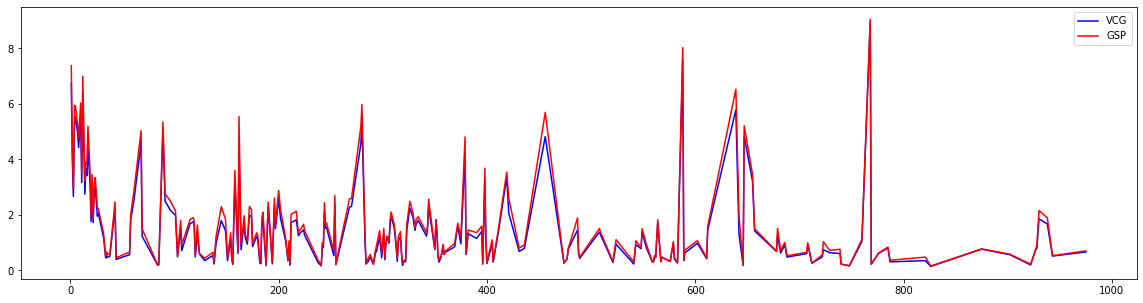

In [ ]:
auction_avg_revenue_df = generate_VCG_GSP_phrase_average_revenue()
auction_avg_revenue_df.head()
plt.figure(figsize=(20,5))
plt.plot(auction_avg_revenue_df.PHRASE_ID, auction_avg_revenue_df.VCG_Revenue, c='b', label='VCG')
plt.plot(auction_avg_revenue_df.PHRASE_ID, auction_avg_revenue_df.GSP_Revenue, c='r', label='GSP') 
plt.legend()
plt.savefig('/content/drive/My Drive/COMPSCI590 Project/VCG_GSP_plot.png')

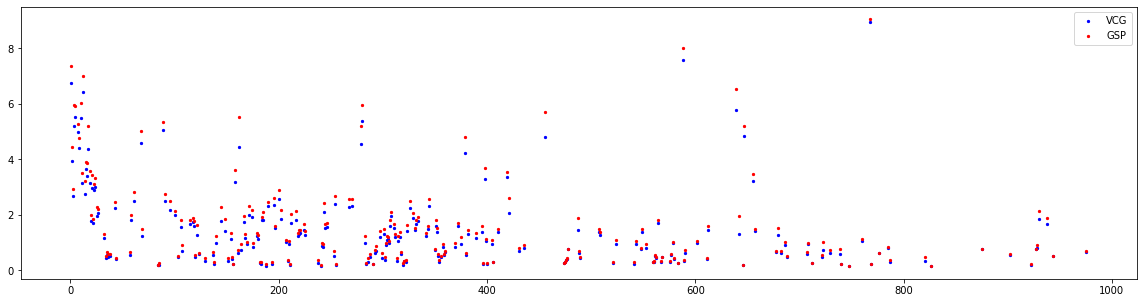

In [ ]:
auction_avg_revenue_df = generate_VCG_GSP_phrase_average_revenue()
auction_avg_revenue_df.head()
plt.figure(figsize=(20,5))
plt.scatter(auction_avg_revenue_df.PHRASE_ID, auction_avg_revenue_df.VCG_Revenue, s=5, c='b', label='VCG')
plt.scatter(auction_avg_revenue_df.PHRASE_ID, auction_avg_revenue_df.GSP_Revenue, s=5, c='r', label='GSP')  
plt.legend()
plt.savefig('/content/drive/My Drive/COMPSCI590 Project/VCG_GSP_scatter.png')

In [ ]:
class auction_design:
  def __init__(self, auction_type, num_slots, res_p, avg_zero, ads_cost):
    self.auction_type = auction_type
    self.num_slots = num_slots
    self.res_p = res_p
    self.ads_cost = ads_cost
    self.count = [0]
    self.avg = [avg_zero]
  
  def __str__(self):
    return "Auction Type: {0}, Number of Slots: {1}, Reserved Price: {2}, Ads Cost: {3}".format(self.auction_type, self.num_slots, self.res_p, self.ads_cost)

In [ ]:
def get_phrase_data_and_auction_groups(data, phrase_id):
  subset_phrase = data[data['PHRASE_ID'] == phrase_id]
  phrase_3_bidders = pd.DataFrame(subset_phrase.groupby('AUCTION_GRP')['ACCOUNT_ID'].nunique() > 3)
  auction_groups = phrase_3_bidders[phrase_3_bidders['ACCOUNT_ID'] == True].index.values
  return subset_phrase, auction_groups

In [ ]:
def get_designs_phrase_1():
  designs = []
  # designs.append(auction_design("VCG", num_slots = 3, res_p = 30, avg_zero = 10, ads_cost = 0.5))
  designs.append(auction_design("VCG", num_slots = 3, res_p = 15, avg_zero = 10, ads_cost = 1))
  designs.append(auction_design("VCG", num_slots = 2, res_p = 15, avg_zero = 10, ads_cost = 1))
  designs.append(auction_design("GSP", num_slots = 3, res_p = 15, avg_zero = 10, ads_cost = 1))
  designs.append(auction_design("GSP", num_slots = 2, res_p = 15, avg_zero = 10, ads_cost = 1))
  designs.append(auction_design("VCG", num_slots = 3, res_p = 10, avg_zero = 10, ads_cost = 1))
  designs.append(auction_design("VCG", num_slots = 2, res_p = 10, avg_zero = 10, ads_cost = 1))
  designs.append(auction_design("GSP", num_slots = 3, res_p = 10, avg_zero = 10, ads_cost = 1))
  designs.append(auction_design("GSP", num_slots = 2, res_p = 10, avg_zero = 10, ads_cost = 1))
  return designs

def get_designs_phrase_2():
  designs = []
  # designs.append(auction_design("VCG", num_slots = 3, res_p = 30, avg_zero = 10, ads_cost = 0.5))
  designs.append(auction_design("VCG", num_slots = 3, res_p = 10, avg_zero = 10, ads_cost = 0.5))
  designs.append(auction_design("VCG", num_slots = 2, res_p = 10, avg_zero = 10, ads_cost = 0.5))
  designs.append(auction_design("GSP", num_slots = 3, res_p = 10, avg_zero = 10, ads_cost = 0.5))
  designs.append(auction_design("GSP", num_slots = 2, res_p = 10, avg_zero = 10, ads_cost = 0.5))
  designs.append(auction_design("VCG", num_slots = 3, res_p = 5, avg_zero = 10, ads_cost = 0.5))
  designs.append(auction_design("VCG", num_slots = 2, res_p = 5, avg_zero = 10, ads_cost = 0.5))
  designs.append(auction_design("GSP", num_slots = 3, res_p = 5, avg_zero = 10, ads_cost = 0.5))
  designs.append(auction_design("GSP", num_slots = 2, res_p = 5, avg_zero = 10, ads_cost = 0.5))
  return designs

In [ ]:
def get_designs_phrase(subset_phrase):
  diff_reserve_prices = pd.DataFrame(subset_phrase['PRICE'].describe(percentiles = [0.2, 0.3, 0.4])).T
  resp_p_1 = diff_reserve_prices['20%'].values[0]
  resp_p_2 = diff_reserve_prices['30%'].values[0]
  resp_p_3 = diff_reserve_prices['40%'].values[0]
  ads_cost = diff_reserve_prices['mean'].values[0] * 0.05
  designs = []

  designs.append(auction_design("VCG", num_slots = 3, res_p = resp_p_1, avg_zero = 10, ads_cost = ads_cost))
  designs.append(auction_design("VCG", num_slots = 2, res_p = resp_p_1, avg_zero = 10, ads_cost = ads_cost))
  # designs.append(auction_design("VCG", num_slots = 1, res_p = resp_p_1, avg_zero = 10, ads_cost = ads_cost))
  designs.append(auction_design("GSP", num_slots = 3, res_p = resp_p_1, avg_zero = 10, ads_cost = ads_cost))
  designs.append(auction_design("GSP", num_slots = 2, res_p = resp_p_1, avg_zero = 10, ads_cost = ads_cost))
  # designs.append(auction_design("GSP", num_slots = 1, res_p = resp_p_1, avg_zero = 10, ads_cost = ads_cost))

  designs.append(auction_design("VCG", num_slots = 3, res_p = resp_p_2, avg_zero = 10, ads_cost = ads_cost))
  designs.append(auction_design("VCG", num_slots = 2, res_p = resp_p_2, avg_zero = 10, ads_cost = ads_cost))
  # designs.append(auction_design("VCG", num_slots = 1, res_p = resp_p_2, avg_zero = 10, ads_cost = ads_cost))
  designs.append(auction_design("GSP", num_slots = 3, res_p = resp_p_2, avg_zero = 10, ads_cost = ads_cost))
  designs.append(auction_design("GSP", num_slots = 2, res_p = resp_p_2, avg_zero = 10, ads_cost = ads_cost))
  # designs.append(auction_design("GSP", num_slots = 1, res_p = resp_p_2, avg_zero = 10, ads_cost = ads_cost))

  designs.append(auction_design("VCG", num_slots = 3, res_p = resp_p_3, avg_zero = 10, ads_cost = ads_cost))
  designs.append(auction_design("VCG", num_slots = 2, res_p = resp_p_3, avg_zero = 10, ads_cost = ads_cost))
  # designs.append(auction_design("VCG", num_slots = 1, res_p = resp_p_3, avg_zero = 10, ads_cost = ads_cost))
  designs.append(auction_design("GSP", num_slots = 3, res_p = resp_p_3, avg_zero = 10, ads_cost = ads_cost))
  designs.append(auction_design("GSP", num_slots = 2, res_p = resp_p_3, avg_zero = 10, ads_cost = ads_cost))
  # designs.append(auction_design("GSP", num_slots = 1, res_p = resp_p_3, avg_zero = 10, ads_cost = ads_cost))

  return designs

In [ ]:
def update_average_zero(subset_phrase, auction_groups, designs):
  for design in designs:
    average_revenue = 0
    for auction_group in auction_groups[:20]:
      auction = subset_phrase[subset_phrase['AUCTION_GRP'] == auction_group]
      payments = {}
      if design.auction_type == "VCG":
        payments = VCG(auction, num_slots = design.num_slots, res_p = design.res_p)
      else:
        payments = GSP(auction, num_slots = design.num_slots, res_p = design.res_p)
      average_revenue += payments['revenue']
    average_revenue /= 20
    design.avg[0] = average_revenue
  return designs

In [ ]:
def bandit_algo(subset_phrase, auction_groups, designs, prior_info=False):
  k = len(designs)
  tau_start = 0.1
  tau_end = 0.01
  t = 0
  total_revenue = 0
  auction_start = 0
  # print("Auction groups: ", len(auction_groups))
  if prior_info:
    designs = update_average_zero(subset_phrase, auction_groups, designs)
    # for design in designs:
    #   print(str(design), 'Initial Average: ', design.avg[0])
    auction_start = 21
  for auction_group in auction_groups[auction_start:]:
    auction = subset_phrase[subset_phrase['AUCTION_GRP'] == auction_group]
    tau_t = tau_start + (tau_end - tau_start) * t / len(auction_groups)
    D = []
    for i in range(1,k+1):
      # Probability of drawing design i
      D.append(np.exp(designs[i-1].avg[t] / tau_t))
    sum = np.sum(D)
    for i in range(1,k+1):
      D[i-1] = D[i-1] / sum
    design_selected = np.random.choice(designs, p = D)
    payments = {}
    if design_selected.auction_type == "VCG":
      payments = VCG(auction, num_slots = design_selected.num_slots, res_p = design_selected.res_p, ads_cost = design_selected.ads_cost)
    else:
      payments = GSP(auction, num_slots = design_selected.num_slots, res_p = design_selected.res_p, ads_cost = design_selected.ads_cost)
    outcome = payments['revenue']
    
    for design in designs:
      design.avg.append(design.avg[-1])
      design.count.append(design.count[-1])

    index = designs.index(design_selected)
    designs[index].avg[-1] = (designs[index].avg[-1] * designs[index].count[-1] + outcome) / (designs[index].count[-1] + 1)
    designs[index].count[-1] = designs[index].count[-1] + 1
    t += 1
    total_revenue += payments['revenue']

  index, element = max(enumerate(D), key=itemgetter(1))
  final_design = designs[index]
  return total_revenue, final_design

In [ ]:
def complete_bandit_algo(data, phrase_id):
  subset_phrase, auction_groups = get_phrase_data_and_auction_groups(data, phrase_id)
  designs = get_designs_phrase(subset_phrase)
  print('Designs Fetched!')
  total_revenue, final_design = bandit_algo(subset_phrase, auction_groups, designs)
  print('Phrase id: ', phrase_id)
  print('Total Revenue: ', total_revenue)
  print('Final Design: ', final_design)
  return total_revenue

In [ ]:
def total_revenue_from_design(subset_phrase, auction_groups, design):
  total_revenue = 0
  for auction_group in auction_groups:
    auction = subset_phrase[subset_phrase['AUCTION_GRP'] == auction_group]
    if design.auction_type == "VCG":
      payments = VCG(auction, num_slots = design.num_slots, res_p = design.res_p, ads_cost = design.ads_cost)
    else:
      payments = GSP(auction, num_slots = design.num_slots, res_p = design.res_p, ads_cost = design.ads_cost)
    total_revenue += payments['revenue']
  return total_revenue

In [ ]:
def update_stats(stats, highest_revenue, bandit_revenue, final_design):
  if final_design.auction_type == 'VCG':
    stats['VCG'] = stats['VCG'] + 1
  else:
    stats['GSP'] = stats['GSP'] + 1
  stats['average_slots'] = stats['average_slots'] + final_design.num_slots
  stats['average_reserve_price'] = stats['average_reserve_price'] + final_design.res_p
  stats['average_ratio_bandit_highest'] = stats['average_ratio_bandit_highest'] + bandit_revenue/highest_revenue
  return stats

In [ ]:
def compare_with_bandit_algo(data, final_phrase_ids):
  result = pd.DataFrame(columns=['PHRASE_ID', 'TOTAL_REVENUE', 'DESIGN'])
  stats_with_prior_info = {'GSP':0, 'VCG':0, 'average_slots': 0, 'average_reserve_price':0, 'average_ratio_bandit_highest':0}
  stats_without_prior_info = {'GSP':0, 'VCG':0, 'average_slots': 0, 'average_reserve_price':0, 'average_ratio_bandit_highest':0}
  for phrase_id in final_phrase_ids:
    subset_phrase, auction_groups = get_phrase_data_and_auction_groups(data, phrase_id)
    designs = get_designs_phrase(subset_phrase)
    highest_revenue = 0
    for design in designs:
      design_revenue = total_revenue_from_design(subset_phrase, auction_groups, design)
      highest_revenue = max(highest_revenue, design_revenue)
      row = {'PHRASE_ID': phrase_id, 'TOTAL_REVENUE': design_revenue, 'DESIGN': str(design)}
      result = result.append(row, ignore_index=True)
    bandit_revenue, final_design = bandit_algo(subset_phrase, auction_groups, designs, prior_info=True)
    row = {'PHRASE_ID': phrase_id, 'TOTAL_REVENUE': bandit_revenue, 'DESIGN': 'Bandit Algorithm with Prior Info - '+ str(final_design)}
    stats_with_prior_info = update_stats(stats_with_prior_info, highest_revenue, bandit_revenue, final_design)
    result = result.append(row, ignore_index=True)
    bandit_revenue, final_design = bandit_algo(subset_phrase, auction_groups, designs)
    row = {'PHRASE_ID': phrase_id, 'TOTAL_REVENUE': bandit_revenue, 'DESIGN': 'Bandit Algorithm without Prior Info - '+ str(final_design)}
    stats_without_prior_info = update_stats(stats_without_prior_info, highest_revenue, bandit_revenue, final_design)
    result = result.append(row, ignore_index=True)
  result.to_csv('/content/drive/My Drive/COMPSCI590 Project/comparison_results_all_phrase_ids_v2.csv', index=False)
  stats_with_prior_info['average_slots'] = stats_with_prior_info['average_slots']/len(final_phrase_ids)
  stats_with_prior_info['average_reserve_price'] = stats_with_prior_info['average_reserve_price']/len(final_phrase_ids)
  stats_with_prior_info['average_ratio_bandit_highest'] = stats_with_prior_info['average_ratio_bandit_highest']/len(final_phrase_ids)
  stats_without_prior_info['average_slots'] = stats_without_prior_info['average_slots']/len(final_phrase_ids)
  stats_without_prior_info['average_reserve_price'] = stats_without_prior_info['average_reserve_price']/len(final_phrase_ids)
  stats_without_prior_info['average_ratio_bandit_highest'] = stats_without_prior_info['average_ratio_bandit_highest']/len(final_phrase_ids)
  return result, stats_with_prior_info, stats_without_prior_info

In [ ]:
result, stats_with_prior_info, stats_without_prior_info = compare_with_bandit_algo(data, final_phrase_ids)
print(stats_with_prior_info)
print(stats_without_prior_info)

{'GSP': 180, 'VCG': 63, 'average_slots': 2.345679012345679, 'average_reserve_price': 3.482876543209874, 'average_ratio_bandit_highest': 0.7727532110010604}
{'GSP': 166, 'VCG': 77, 'average_slots': 2.337448559670782, 'average_reserve_price': 3.509502057613167, 'average_ratio_bandit_highest': 0.8858449864787908}
